In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
data = pd.read_excel('Sales_Data.xlsx')
data

,Order Date,Sales
0,2015-01-01,14205.7070
1,2015-02-01,4519.8920
2,2015-03-01,55205.7970
3,2015-04-01,27906.8550
4,2015-05-01,23644.3030
5,2015-06-01,34322.9356
6,2015-07-01,33781.5430
7,2015-08-01,27117.5365
8,2015-09-01,81623.5268
9,2015-10-01,31453.3930


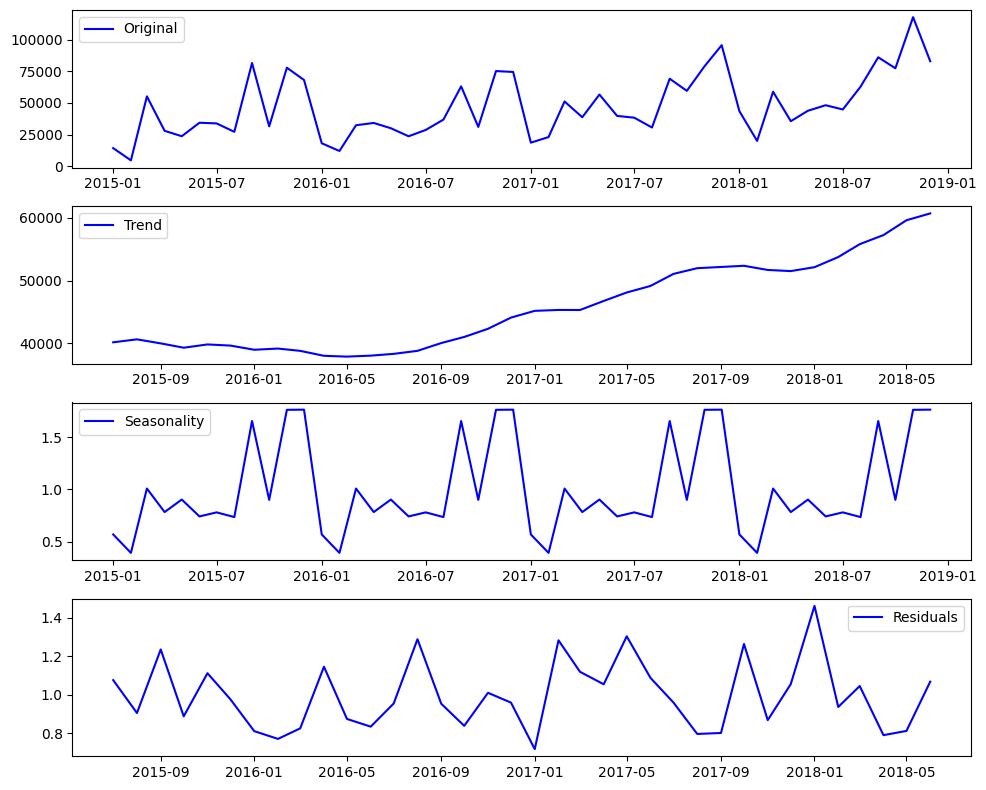

In [26]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)
data.index.freq = 'MS'
# Descomponer la serie de tiempo
decomposition = seasonal_decompose(data['Sales'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Graficar las componentes
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(data['Sales'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


ADF Statistic: -4.416136761430769
p-value: 0.00027791039276670623


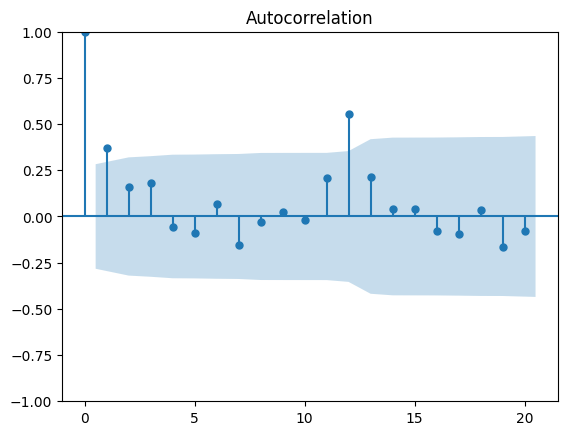

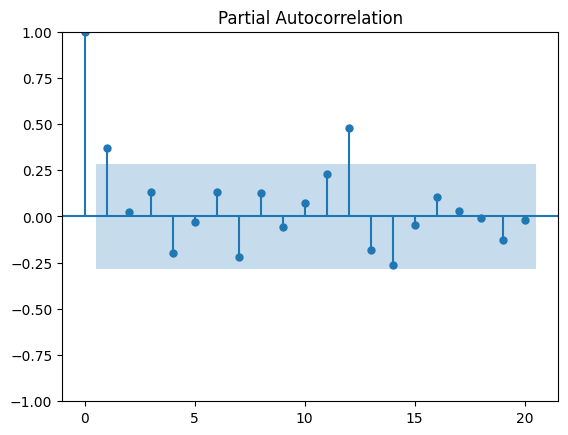

In [27]:
# Paso 2: Identificación de parámetros ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Test de Dickey-Fuller
result = adfuller(data['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Funciones de autocorrelación
plot_acf(data['Sales'], lags=20)
plt.show()

plot_pacf(data['Sales'], lags=20)
plt.show()


In [28]:
# Paso 3: Dividir la data y entrenar el modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Dividir la data en entrenamiento y testeo
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Instanciar y entrenar modelo ARIMA manualmente
model = ARIMA(train, order=(5, 1, 0))
arima_model = model.fit()

# Entrenar modelo ARIMA automáticamente con auto_arima
autoarima_model = auto_arima(train, seasonal=True, m=12)

# Hacer predicciones
predictions_arima = arima_model.forecast(steps=len(test))
predictions_autoarima = autoarima_model.predict(n_periods=len(test))

# Convertir predicciones a DataFrame
predictions_arima_df = pd.DataFrame(predictions_arima, index=test.index, columns=['ARIMA Predictions'])
predictions_autoarima_df = pd.DataFrame(predictions_autoarima, index=test.index, columns=['AutoARIMA Predictions'])


MSE ARIMA: 865075618.068362
MSE AutoARIMA: 665814047.8267652


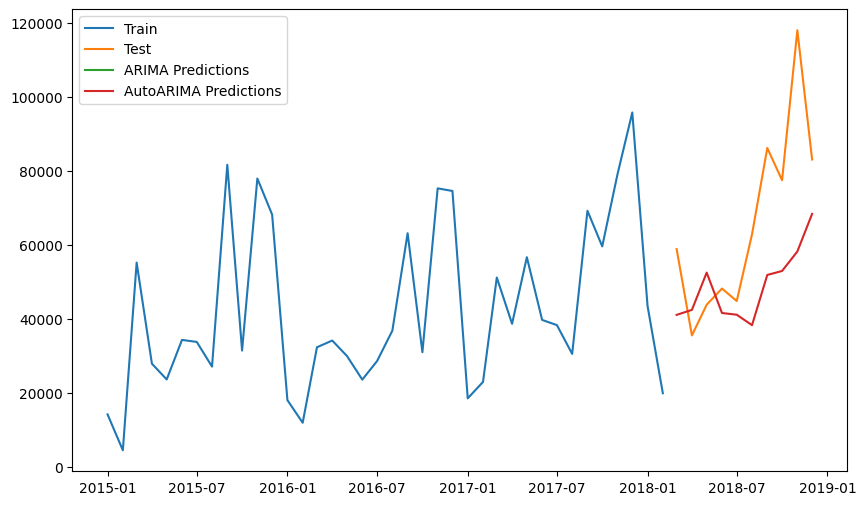

In [29]:
# Paso 4: Evaluar modelos y generar gráfico de ajuste
from sklearn.metrics import mean_squared_error

# Evaluar modelo ARIMA
mse_arima = mean_squared_error(test, predictions_arima)
print('MSE ARIMA:', mse_arima)

# Evaluar modelo AutoARIMA
mse_autoarima = mean_squared_error(test, predictions_autoarima)
print('MSE AutoARIMA:', mse_autoarima)

# Graficar ajuste
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions_arima_df, label='ARIMA Predictions')
plt.plot(predictions_autoarima_df, label='AutoARIMA Predictions')
plt.legend(loc='best')
plt.show()
